In [3]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from timeit import default_timer as timer
from matplotlib.ticker import MaxNLocator
import math

## 300 Patients, pmf = 0.4

In [9]:
# To check how long the process takes to process 1k patients
start_time = timer()

command_300_patients_01 = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.4 -n 300"
output_300_patients_01 = subprocess.run(command_300_patients_01, capture_output=True, text=True)
lines_300_patients_01 = output_300_patients_01.stdout.splitlines()
df_300_patients_01 = pd.DataFrame([line.split(',') for line in lines_300_patients_01], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_300_patients_01 = df_300_patients_01.iloc[1:]
df_300_patients_01 = df_300_patients_01.apply(pd.to_numeric, errors='coerce')

end_time = timer()
print("Time elapsed in seconds: ",end_time - start_time)
print("Time elapsed in minutes: ",(end_time - start_time)/60)

Time elapsed in seconds:  4.390082900004927
Time elapsed in minutes:  0.07316804833341545


In [10]:
wide_dfs_300_patients_01 = df_300_patients_01.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

df_wide = wide_dfs_300_patients_01  # Access the wide-format DataFrame
df_300_patients_day14_01 = df_wide.loc[336.0]
df_300_patients_day14_sorted_01 = df_300_patients_day14_01.sort_values()
df_300_patients_day28_01 = df_wide.loc[671.0]
df_300_patients_day28_sorted_01 = df_300_patients_day28_01.sort_values()

# Merge the DataFrames on the index 'PID'
df_300_patients_days_14_28_merged_01 = pd.merge(df_300_patients_day14_01, df_300_patients_day28_01, on='PID')
df_300_patients_days_14_28_merged_01 = df_300_patients_days_14_28_merged_01.rename(columns={336.0:'day14', 671.0:'day28'})

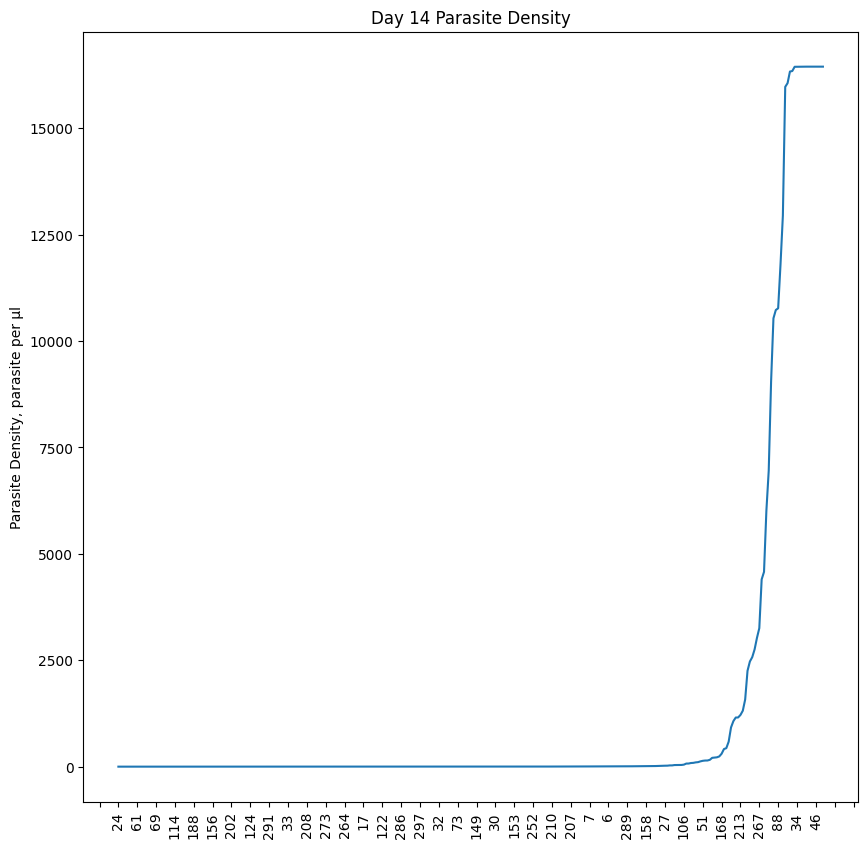

In [6]:
temp = df_300_patients_day14_sorted_01
temp = temp.to_frame(name="Day14_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(10, 10))
plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=50))  # Adjust 'nbins' as needed
plt.title('Day 14 Parasite Density')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_14_pd_10kpatients_pmf_0.4_sorted.png')

# Show the plot
plt.show()

In [7]:
temp = df_300_patients_day28_sorted
temp = temp.to_frame(name="Day28_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(10, 10))
plt.plot(range(len(temp)), temp['Day28_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=50))  # Adjust 'nbins' as needed
plt.title('Day 28 Parasite Density')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_28_pd_10kpatients_pmf_0.4_sorted.png')

# Show the plot
plt.show()

NameError: name 'df_300_patients_day28_sorted' is not defined

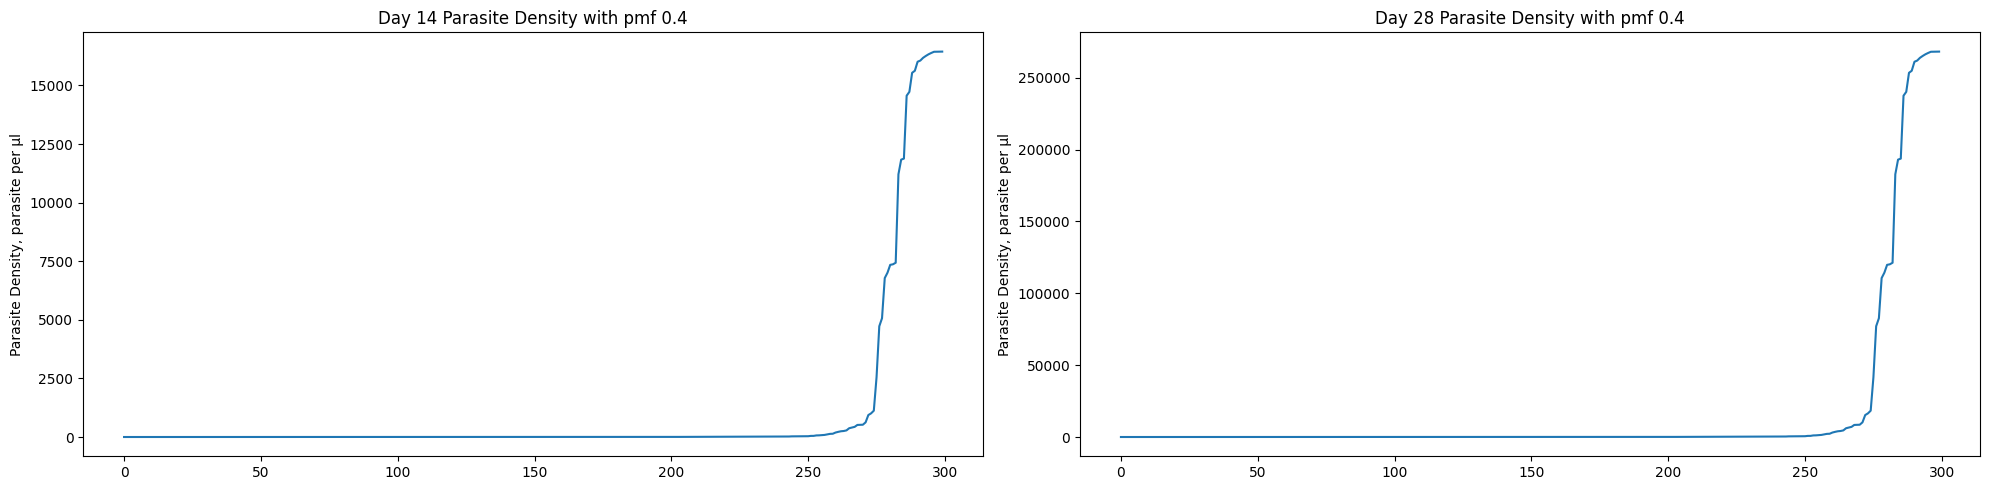

In [11]:
nrows = 1
ncols = 2

temp = df_300_patients_day14_sorted_01
temp = temp.to_frame(name="Day14_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(20, 5))
ax = plt.subplot(nrows, ncols, 1)
plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 14 Parasite Density with pmf 0.4')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

temp = df_300_patients_day28_sorted_01
temp = temp.to_frame(name="Day28_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

ax = plt.subplot(nrows, ncols, 2)
plt.plot(range(len(temp)), temp['Day28_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 28 Parasite Density with pmf 0.4')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_24_28_pd_10kpatients_pmf_0.4_sorted_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

## 300 Patients, pmf = 0.8

In [12]:
# To check how long the process takes to process 1k patients
start_time = timer()

command_300_patients_02 = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 0.8 -n 300"
output_300_patients_02 = subprocess.run(command_300_patients_02, capture_output=True, text=True)
lines_300_patients_02 = output_300_patients_02.stdout.splitlines()
df_300_patients_02 = pd.DataFrame([line.split(',') for line in lines_300_patients_02], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_300_patients_02 = df_300_patients_02.iloc[1:]
df_300_patients_02 = df_300_patients_02.apply(pd.to_numeric, errors='coerce')

end_time = timer()
print("Time elapsed in seconds: ",end_time - start_time)
print("Time elapsed in minutes: ",(end_time - start_time)/60)

Time elapsed in seconds:  5.1577280999918
Time elapsed in minutes:  0.08596213499986334


In [13]:
wide_dfs_300_patients_02 = df_300_patients_02.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

df_wide = wide_dfs_300_patients_02  # Access the wide-format DataFrame
df_300_patients_day14_02 = df_wide.loc[336.0]
df_300_patients_day14_sorted_02 = df_300_patients_day14_02.sort_values()
df_300_patients_day28_02 = df_wide.loc[671.0]
df_300_patients_day28_sorted_02 = df_300_patients_day28_02.sort_values()

# Merge the DataFrames on the index 'PID'
df_300_patients_days_14_28_merged_02 = pd.merge(df_300_patients_day14_02, df_300_patients_day28_02, on='PID')
df_300_patients_days_14_28_merged_02 = df_300_patients_days_14_28_merged_02.rename(columns={336.0:'day14', 671.0:'day28'})

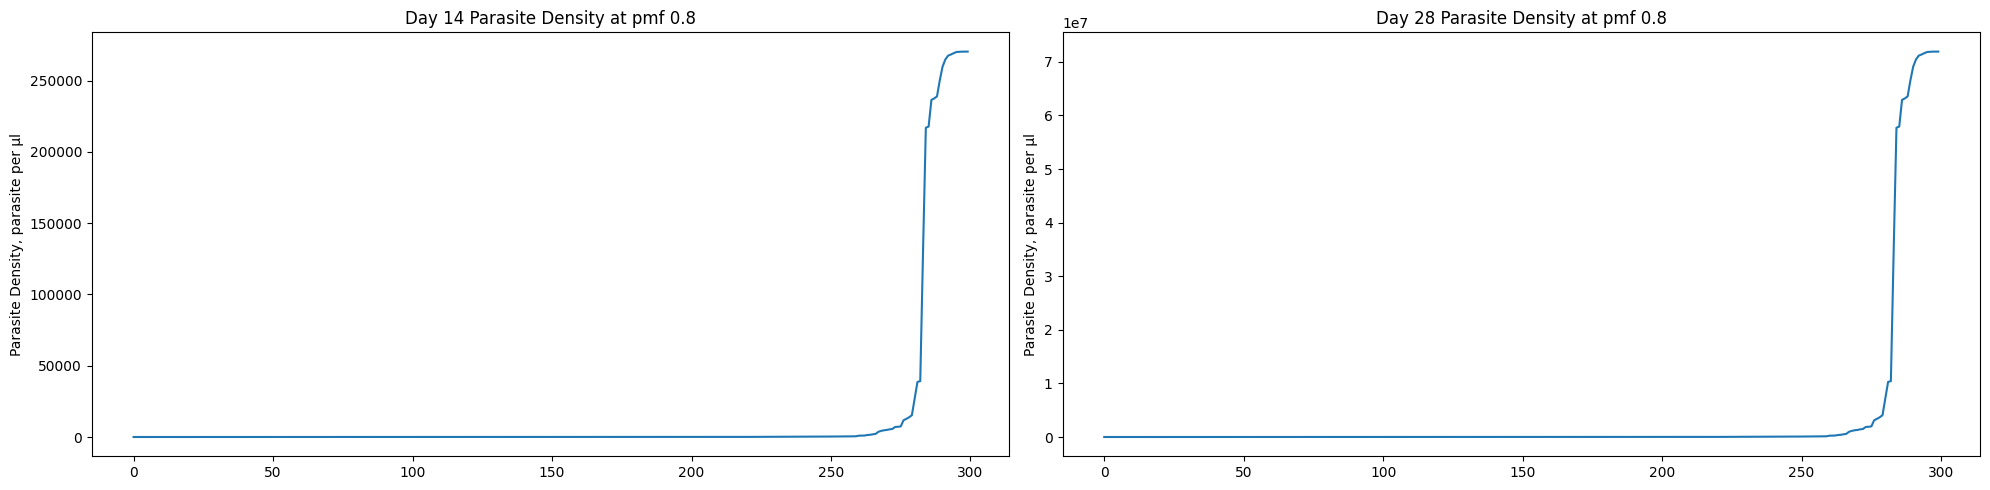

In [14]:
nrows = 1
ncols = 2

temp = df_300_patients_day14_sorted_02
temp = temp.to_frame(name="Day14_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(20, 5))
ax = plt.subplot(nrows, ncols, 1)
plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 14 Parasite Density at pmf 0.8')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

temp = df_300_patients_day28_sorted_02
temp = temp.to_frame(name="Day28_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

ax = plt.subplot(nrows, ncols, 2)
plt.plot(range(len(temp)), temp['Day28_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 28 Parasite Density at pmf 0.8')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_24_28_pd_10kpatients_pmf_0.8_sorted_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

## 300 Patients, pmf 1

In [15]:
# To check how long the process takes to process 1k patients
start_time = timer()

command_300_patients_03 = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 1 -n 300"
output_300_patients_03 = subprocess.run(command_300_patients_03, capture_output=True, text=True)
lines_300_patients_03 = output_300_patients_03.stdout.splitlines()
df_300_patients_03 = pd.DataFrame([line.split(',') for line in lines_300_patients_03], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_300_patients_03 = df_300_patients_03.iloc[1:]
df_300_patients_03 = df_300_patients_03.apply(pd.to_numeric, errors='coerce')

end_time = timer()
print("Time elapsed in seconds: ",end_time - start_time)
print("Time elapsed in minutes: ",(end_time - start_time)/60)

Time elapsed in seconds:  4.672696500012535
Time elapsed in minutes:  0.07787827500020891


In [16]:
wide_dfs_300_patients_03 = df_300_patients_03.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

df_wide = wide_dfs_300_patients_03  # Access the wide-format DataFrame
df_300_patients_day14_03 = df_wide.loc[336.0]
df_300_patients_day14_sorted_03 = df_300_patients_day14_03.sort_values()
df_300_patients_day28_03 = df_wide.loc[671.0]
df_300_patients_day28_sorted_03 = df_300_patients_day28_03.sort_values()

# Merge the DataFrames on the index 'PID'
df_300_patients_days_14_28_merged_03 = pd.merge(df_300_patients_day14_03, df_300_patients_day28_03, on='PID')
df_300_patients_days_14_28_merged_03 = df_300_patients_days_14_28_merged_03.rename(columns={336.0:'day14', 671.0:'day28'})

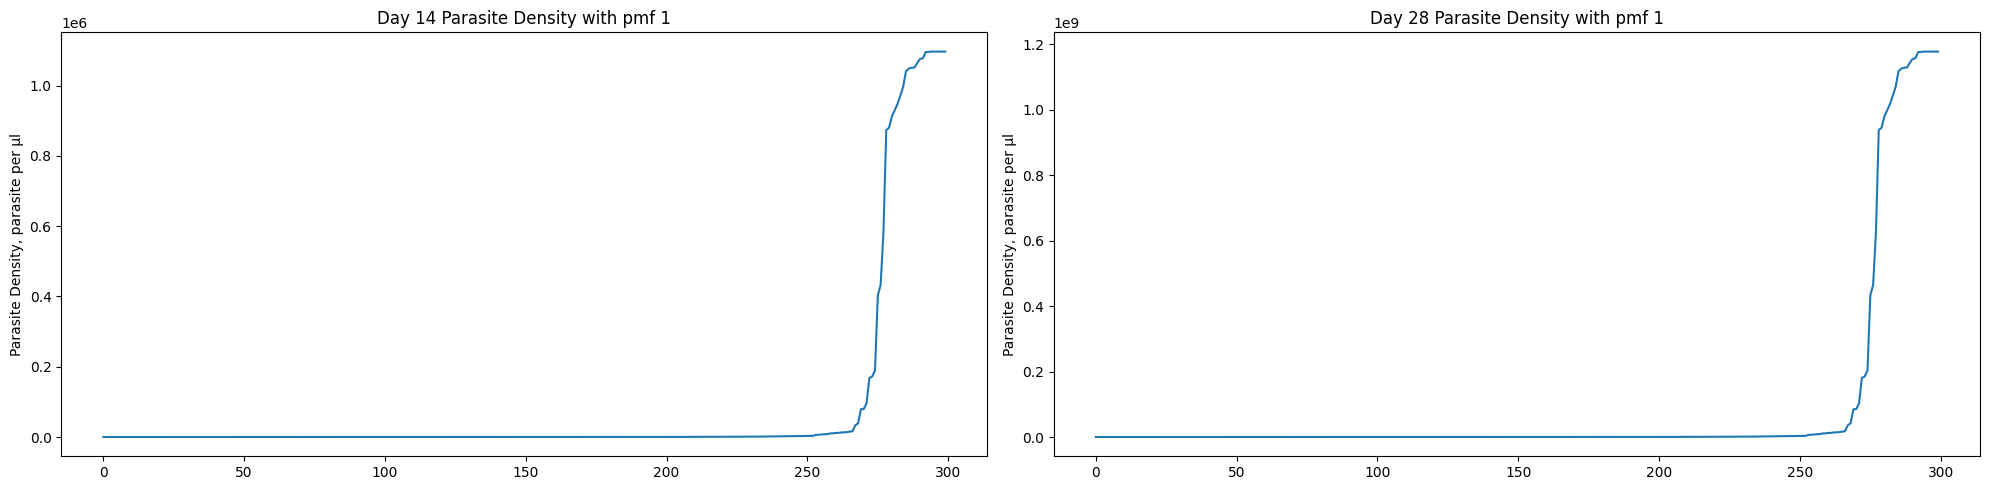

In [17]:
nrows = 1
ncols = 2

temp = df_300_patients_day14_sorted_03
temp = temp.to_frame(name="Day14_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(20, 5))
ax = plt.subplot(nrows, ncols, 1)
plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 14 Parasite Density with pmf 1')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

temp = df_300_patients_day28_sorted_03
temp = temp.to_frame(name="Day28_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

ax = plt.subplot(nrows, ncols, 2)
plt.plot(range(len(temp)), temp['Day28_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 28 Parasite Density with pmf 1')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_24_28_pd_10kpatients_pmf_1.2_sorted_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

## 300 Patients, pmf 5

In [ ]:
# To check how long the process takes to process 1k patients
start_time = timer()

command_300_patients_04 = "C:/Users/tus88262/Documents/GitHub/2019-test-ppq-pk/build/Debug/run_ppq_pk.exe --lum --pmf 5 -n 300"
output_300_patients_04 = subprocess.run(command_300_patients_04, capture_output=True, text=True)
lines_300_patients_04 = output_300_patients_04.stdout.splitlines()
df_300_patients_04 = pd.DataFrame([line.split(',') for line in lines_300_patients_04], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_300_patients_04 = df_300_patients_04.iloc[1:]
df_300_patients_04 = df_300_patients_04.apply(pd.to_numeric, errors='coerce')

end_time = timer()
print("Time elapsed in seconds: ",end_time - start_time)
print("Time elapsed in minutes: ",(end_time - start_time)/60)

In [ ]:
wide_dfs_300_patients_04 = df_300_patients_04.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")

df_wide = wide_dfs_300_patients_04  # Access the wide-format DataFrame
df_300_patients_day14_04 = df_wide.loc[336.0]
df_300_patients_day14_sorted_04 = df_300_patients_day14_04.sort_values()
df_300_patients_day28_04 = df_wide.loc[671.0]
df_300_patients_day28_sorted_04 = df_300_patients_day28_04.sort_values()

# Merge the DataFrames on the index 'PID'
df_300_patients_days_14_28_merged_04 = pd.merge(df_300_patients_day14_04, df_300_patients_day28_04, on='PID')
df_300_patients_days_14_28_merged_04 = df_300_patients_days_14_28_merged_04.rename(columns={336.0:'day14', 671.0:'day28'})

In [ ]:
nrows = 1
ncols = 2

temp = df_300_patients_day14_sorted_04
temp = temp.to_frame(name="Day14_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

plt.figure(figsize=(20, 5))
ax = plt.subplot(nrows, ncols, 1)
plt.plot(range(len(temp)), temp['Day14_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 14 Parasite Density with pmf 1.2')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

temp = df_300_patients_day28_sorted_04
temp = temp.to_frame(name="Day28_ParasiteDensity")
temp = temp.reset_index().rename(columns={'index': 'PID'})

ax = plt.subplot(nrows, ncols, 2)
plt.plot(range(len(temp)), temp['Day28_ParasiteDensity'])  # Use range of length for x-axis
# Set x-ticks to show PID values
#plt.xticks(range(len(temp)), temp['PID'], rotation='vertical')  # Set x-ticks to PID values
#plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(MaxNLocator(nbins=25))  # Adjust 'nbins' as needed
plt.title('Day 28 Parasite Density with pmf 1.2')
#plt.legend()  # Add a legend
# Add labels to the y axis of the figure
plt.ylabel('Parasite Density, parasite per µl')  # Y-axis label

#Save plot
plt.savefig('lum_day_24_28_pd_10kpatients_pmf_5_sorted_merged.png')

# Show the plot
plt.tight_layout()
plt.show()

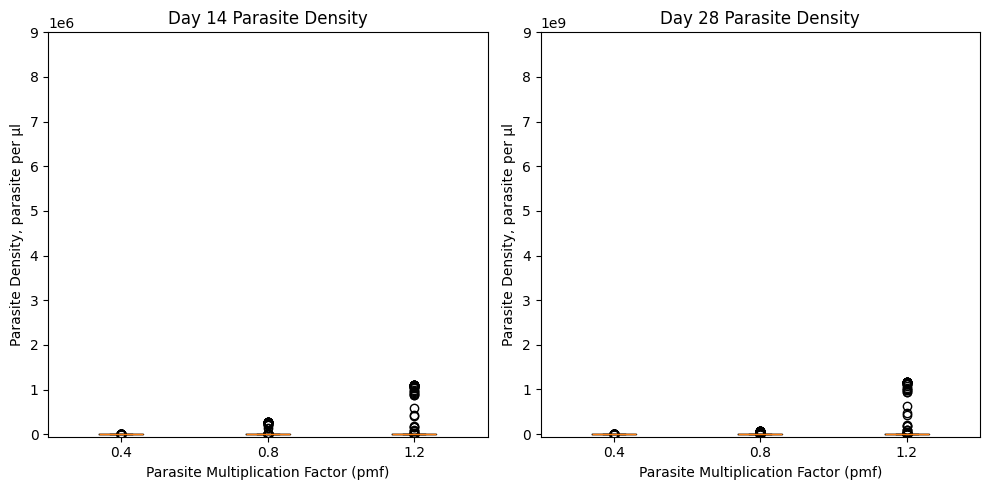

In [18]:
#Box plots of day 14 and day 28 data from pmf 0.4, 0.8, 1.2

nrows = 1
ncols = 2

plt.figure(figsize=(10, 5))

ax = plt.subplot(nrows, ncols, 1)
day_14_data = [df_300_patients_day14_01,df_300_patients_day14_02,df_300_patients_day14_03]
#max_value_day14 = int(pd.concat([df_300_patients_day14_01, df_300_patients_day14_02, df_300_patients_day14_03]).max())
plt.boxplot(day_14_data)
plt.title('Day 14 Parasite Density')
plt.ylabel('Parasite Density, parasite per µl')
plt.xlabel('Parasite Multiplication Factor (pmf)')
# Customizing x-ticks to label each box plot
plt.xticks([1, 2, 3], ['0.4', '0.8', '1.2'])
#plt.yticks(np.arange(0, max_value_day14, 10000000))  # Set y-ticks intervals for Day 14
plt.yticks(np.arange(0, 10**7, step= 10**6))  # Adjust the step as needed

ax = plt.subplot(nrows, ncols, 2)
day_28_data = [df_300_patients_day28_01,df_300_patients_day28_02,df_300_patients_day28_03]
#max_value_day28 = int(pd.concat([df_300_patients_day28_01,df_300_patients_day28_02,df_300_patients_day28_03]).max())
plt.boxplot(day_28_data)
plt.title('Day 28 Parasite Density')
plt.ylabel('Parasite Density, parasite per µl')
plt.xlabel('Parasite Multiplication Factor (pmf)')
# Customizing x-ticks to label each box plot
plt.xticks([1, 2, 3], ['0.4', '0.8', '1.2'])
#plt.yticks(np.arange(0, max_value_day28, 10000000))  # Set y-ticks intervals for Day 28
plt.yticks(np.arange(0, 10**10, step= 10**9))  # Adjust the step as needed


plt.tight_layout()
plt.show()

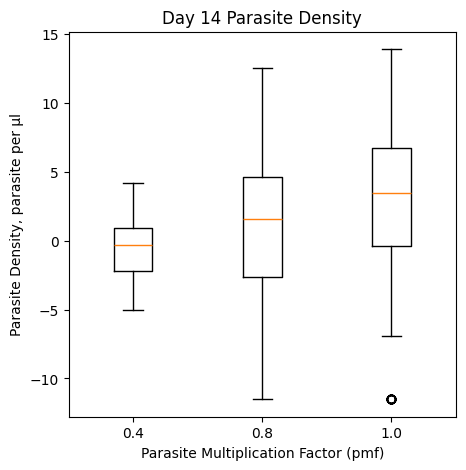

In [53]:
#Box plots of day 14 and day 28 data from pmf 0.4, 0.8, 1.2

plt.figure(figsize=(5, 5))

day_14_data = [np.log10(df_300_patients_day14_01 + 0.00001),np.log(df_300_patients_day14_02 + 0.00001),np.log(df_300_patients_day14_03 + 0.00001)]
#max_value_day14 = int(pd.concat([df_300_patients_day14_01, df_300_patients_day14_02, df_300_patients_day14_03]).max())
plt.boxplot(day_14_data)
plt.title('Day 14 Parasite Density')
plt.ylabel('Parasite Density, parasite per µl')
plt.xlabel('Parasite Multiplication Factor (pmf)')
# Customizing x-ticks to label each box plot
plt.xticks([1, 2, 3], ['0.4', '0.8', '1.0'])
#plt.yticks(np.arange(0, max_value_day14, 10000000))  # Set y-ticks intervals for Day 14
#plt.yticks(np.arange(0, 10**6, step= 10**5))  # Adjust the step as needed

plt.show()

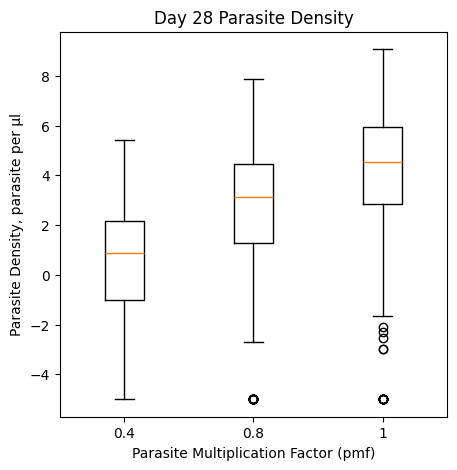

In [55]:
#Box plots of day 14 and day 28 data from pmf 0.4, 0.8, 1.2

plt.figure(figsize=(5, 5))


day_28_data = [np.log10(df_300_patients_day28_01 + 0.00001),np.log10(df_300_patients_day28_02 + 0.00001),np.log10(df_300_patients_day28_03 + 0.00001)]
#max_value_day28 = int(pd.concat([df_300_patients_day28_01,df_300_patients_day28_02,df_300_patients_day28_03]).max())
plt.boxplot((day_28_data))
plt.title('Day 28 Parasite Density')
plt.ylabel('Parasite Density, parasite per µl')
plt.xlabel('Parasite Multiplication Factor (pmf)')
# Customizing x-ticks to label each box plot
plt.xticks([1, 2, 3], ['0.4', '0.8', '1'])
#plt.ylim(0, 1200000)
#plt.yticks(np.arange(0, max_value_day28, 10000000))  # Set y-ticks intervals for Day 28
#plt.ylim(0, 10**8, step = 10**7)  # Adjust the step as needed
#plt.yticks(np.arange(0, 10**9, step= 10**8))  # Adjust the step as needed

plt.show()

In [26]:
print(int(df_300_patients_day28_01.max()))
print(int(df_300_patients_day28_02.max()))
print(int(df_300_patients_day28_03.max()))

268182
71921642
1177809205


In [28]:
df_300_patients_day28_01.quantile([0.25,0.5,0.75])

0.25      0.09975
0.50      7.59200
0.75    140.35950
Name: 671.0, dtype: float64

In [50]:
df_300_patients_day14_02.quantile([0.25,0.5,0.75])

0.25      0.074
0.50      4.980
0.75    103.127
Name: 336.0, dtype: float64

In [30]:
df_300_patients_day28_03.quantile([0.25,0.5,0.75])

0.25       714.0035
0.50     34430.5605
0.75    906193.7675
Name: 671.0, dtype: float64

In [42]:
df_300_patients_day28_01.head

<bound method NDFrame.head of PID
0        46.100
1      2269.624
2       210.146
3       785.792
4         0.000
         ...   
295       0.002
296      91.331
297       0.025
298       0.031
299       0.139
Name: 671.0, Length: 300, dtype: float64>

In [45]:
math.log10(df_300_patients_day28_01)

TypeError: cannot convert the series to <class 'float'>